In [94]:
import pandas as pd
import nltk
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.tokenize import regexp_tokenize,word_tokenize,RegexpTokenizer
import matplotlib.pyplot as plt
import string
import re

In [95]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\asaav\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [96]:
tweet=pd.read_csv('data/judge-1377884607_tweet_product_company.csv',encoding = 'latin1')
tweet.shape

(9093, 3)

In [97]:
tweet.head(11)

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion
5,@teachntech00 New iPad Apps For #SpeechTherapy...,NaN,No emotion toward brand or product
6,NaN,NaN,No emotion toward brand or product
7,"#SXSW is just starting, #CTIA is around the co...",Android,Positive emotion
8,Beautifully smart and simple idea RT @madebyma...,iPad or iPhone App,Positive emotion
9,Counting down the days to #sxsw plus strong Ca...,Apple,Positive emotion


In [98]:
tweet.isna().sum()

tweet_text                                               1
emotion_in_tweet_is_directed_at                       5802
is_there_an_emotion_directed_at_a_brand_or_product       0
dtype: int64

In [99]:
tweet_sample=tweet.sample(1000,random_state=22)
tweet_sample.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
845,My people listening to #google #sxsw @mention ...,NaN,No emotion toward brand or product
2623,Whoa! line at the pop up apple store in downto...,iPad,Positive emotion
8203,Find me at #SXSWi for info on how to get your ...,NaN,No emotion toward brand or product
7430,If Apple pops up a store for an event like SXS...,NaN,No emotion toward brand or product
3382,"#technology #Apple saves #SXSW, set to open po...",NaN,Positive emotion


Generate random samples of for Train Test .

In [143]:
tweet_sample['is_there_an_emotion_directed_at_a_brand_or_product'].value_counts()

2               602
1               326
0                58
I can't tell     14
Name: is_there_an_emotion_directed_at_a_brand_or_product, dtype: int64

In [ ]:
#tweet_train=tweet.sample(600,random_state=22)
#tweet_train.shape

(600, 3)

In [ ]:
#tweet_test=tweet.sample(200,random_state=22)
#tweet_test.shape

(200, 3)

Drop null values

In [ ]:
#tweet_train.isna().sum()

tweet_text                                              0
emotion_in_tweet_is_directed_at                       398
is_there_an_emotion_directed_at_a_brand_or_product      0
dtype: int64

In [ ]:
#tweet_train.dropna(axis=0,inplace=True)
#tweet_train.shape

(202, 3)

In [ ]:
#tweet_train.isna().sum()

tweet_text                                            0
emotion_in_tweet_is_directed_at                       0
is_there_an_emotion_directed_at_a_brand_or_product    0
dtype: int64

replace the emotions with numbers

In [100]:
tweet_sample['is_there_an_emotion_directed_at_a_brand_or_product'].replace(to_replace='Negative emotion',value=0,inplace=True)

In [101]:
tweet_sample['is_there_an_emotion_directed_at_a_brand_or_product'].replace(to_replace='Positive emotion',value=1,inplace=True)

In [102]:
tweet_sample['is_there_an_emotion_directed_at_a_brand_or_product'].replace(to_replace='No emotion toward brand or product',value=2,inplace=True)

In [144]:
tweet_sample['is_there_an_emotion_directed_at_a_brand_or_product'].replace(to_replace="I can't tell",value=2,inplace=True)

In [145]:
tweet_sample.head(10)

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
845,my people listening to #google #sxsw @mention ...,NaN,2
2623,whoa! line at the pop up apple store in downto...,iPad,1
8203,find me at #sxswi for info on how to get your ...,NaN,2
7430,if apple pops up a store for an event like sxs...,NaN,2
3382,"#technology #apple saves #sxsw, set to open po...",NaN,1
2266,the next big thing? hmmm. rt @mention google t...,Google,1
7875,#posterous joins the #sxsw pile on with poster...,NaN,2
8656,so grateful my twitterstream is mostly full of...,NaN,2
1946,i was finally forced to google #sxsw. why can'...,NaN,2
1995,was he standing? talented... rt @mention eww &...,NaN,2


In [ ]:
#X_train=tweet_train[['tweet_text','emotion_in_tweet_is_directed_at']]
#X_train

,tweet_text,emotion_in_tweet_is_directed_at
2623,Whoa! line at the pop up apple store in downto...,iPad
2266,The next big thing? Hmmm. RT @mention Google t...,Google
4937,I have Google Circles invites! Follow me if yo...,Other Google product or service
3610,"Google tries to give doodles a whimsical, fun ...",Google
6431,RT @mention P.S. @mention and Google throw a b...,Google
...,...,...
5853,RT @mention Google previews updated Blogger in...,Other Google product or service
1022,iPad 2 is pretty sick! Almost makes me think I...,iPad
5794,RT @mention Good News! Austin Eats: BBQ for iP...,iPad or iPhone App
1786,The iPad 2 Takes Over #SXSW [#VIDEO] {link} #c...,iPad


In [ ]:
#y_train=tweet_train[['is_there_an_emotion_directed_at_a_brand_or_product']]
#y_train

,is_there_an_emotion_directed_at_a_brand_or_product
2623,1
2266,1
4937,1
3610,1
6431,1
...,...
5853,1
1022,1
5794,1
1786,1


apply lower cases to main doc

In [146]:
tweet_sample['tweet_text']=tweet_sample['tweet_text'].str.lower()
tweet_sample

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
845,my people listening to #google #sxsw @mention ...,NaN,2
2623,whoa! line at the pop up apple store in downto...,iPad,1
8203,find me at #sxswi for info on how to get your ...,NaN,2
7430,if apple pops up a store for an event like sxs...,NaN,2
3382,"#technology #apple saves #sxsw, set to open po...",NaN,1
...,...,...,...
7210,privacy could headline google circles social n...,NaN,2
3529,so i bought an ipad on impulse! must be someth...,iPad,1
2436,google and aclu are buddies?ûï@mention google...,NaN,2
2865,google prefers to launch hyped new social feat...,Google,0


In [147]:
tweet_sample.iloc[10]['tweet_text']

'i have google circles invites! follow me if you are interested! #google #circles #sxsw'

In [148]:
tweet_sample.isna().sum()

tweet_text                                              0
emotion_in_tweet_is_directed_at                       651
is_there_an_emotion_directed_at_a_brand_or_product      0
dtype: int64

In [ ]:
#pattern= r"(?u)\b\w\w+\b\^$"
#tokenizer=RegexpTokenizer(pattern)

In [ ]:
#tweet['tweet_text_token']=tweet['tweet_text'].apply(tokenizer.tokenize)
#tweet

TypeError: expected string or bytes-like object

train test split

In [149]:
X=tweet_sample[['tweet_text','emotion_in_tweet_is_directed_at']]
X

,tweet_text,emotion_in_tweet_is_directed_at
845,my people listening to #google #sxsw @mention ...,NaN
2623,whoa! line at the pop up apple store in downto...,iPad
8203,find me at #sxswi for info on how to get your ...,NaN
7430,if apple pops up a store for an event like sxs...,NaN
3382,"#technology #apple saves #sxsw, set to open po...",NaN
...,...,...
7210,privacy could headline google circles social n...,NaN
3529,so i bought an ipad on impulse! must be someth...,iPad
2436,google and aclu are buddies?ûï@mention google...,NaN
2865,google prefers to launch hyped new social feat...,Google


In [150]:
y=tweet_sample['is_there_an_emotion_directed_at_a_brand_or_product']
y

845     2
2623    1
8203    2
7430    2
3382    1
       ..
7210    2
3529    1
2436    2
2865    0
8196    1
Name: is_there_an_emotion_directed_at_a_brand_or_product, Length: 1000, dtype: int64

In [151]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.25,random_state=42)

Remove null vallues

In [152]:
X_train.isna().sum()

tweet_text                           0
emotion_in_tweet_is_directed_at    488
dtype: int64

In [153]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 750 entries, 8017 to 8506
Data columns (total 2 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   tweet_text                       750 non-null    object
 1   emotion_in_tweet_is_directed_at  262 non-null    object
dtypes: object(2)
memory usage: 17.6+ KB


In [154]:
X_train['tweet_text']=X_train['tweet_text'].fillna('').apply(str)
X_train

<ipython-input-154-be96715989f3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['tweet_text']=X_train['tweet_text'].fillna('').apply(str)


,tweet_text,emotion_in_tweet_is_directed_at
8017,scored a signed print of the jules verne googl...,NaN
960,.@mention on #sxsw with a cr48. there's so muc...,NaN
1025,#technews privacy could headline google circle...,NaN
1505,like that's bad rt @mention sitting at a bar l...,NaN
615,#apple to hawk ipad 2 at #sxsw festival popup ...,iPad or iPhone App
...,...,...
4690,"there is no bigger gathering of web-browsing, ...",NaN
6686,"rt @mention startups at #sxsw, @mention is giv...",NaN
3073,brutal question served up to marissa mayer abo...,NaN
7487,google maps mobile route around traffic featur...,NaN


In [155]:
X_train.isna().sum()

tweet_text                           0
emotion_in_tweet_is_directed_at    488
dtype: int64

In [156]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 750 entries, 8017 to 8506
Data columns (total 2 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   tweet_text                       750 non-null    object
 1   emotion_in_tweet_is_directed_at  262 non-null    object
dtypes: object(2)
memory usage: 17.6+ KB


In [157]:
y_train.value_counts()

2    458
1    252
0     40
Name: is_there_an_emotion_directed_at_a_brand_or_product, dtype: int64

tokenize X_train

In [159]:
pattern= r"(?u)\b\w\w+\b"
tokenizer=RegexpTokenizer(pattern)


In [160]:
X_train['tweet_text_token']=X_train['tweet_text'].apply(tokenizer.tokenize)
X_train

<ipython-input-160-e56a9f61ce29>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['tweet_text_token']=X_train['tweet_text'].apply(tokenizer.tokenize)


,tweet_text,emotion_in_tweet_is_directed_at,tweet_text_token
8017,scored a signed print of the jules verne googl...,NaN,"[scored, signed, print, of, the, jules, verne,..."
960,.@mention on #sxsw with a cr48. there's so muc...,NaN,"[mention, on, sxsw, with, cr48, there, so, muc..."
1025,#technews privacy could headline google circle...,NaN,"[technews, privacy, could, headline, google, c..."
1505,like that's bad rt @mention sitting at a bar l...,NaN,"[like, that, bad, rt, mention, sitting, at, ba..."
615,#apple to hawk ipad 2 at #sxsw festival popup ...,iPad or iPhone App,"[apple, to, hawk, ipad, at, sxsw, festival, po..."
...,...,...,...
4690,"there is no bigger gathering of web-browsing, ...",NaN,"[there, is, no, bigger, gathering, of, web, br..."
6686,"rt @mention startups at #sxsw, @mention is giv...",NaN,"[rt, mention, startups, at, sxsw, mention, is,..."
3073,brutal question served up to marissa mayer abo...,NaN,"[brutal, question, served, up, to, marissa, ma..."
7487,google maps mobile route around traffic featur...,NaN,"[google, maps, mobile, route, around, traffic,..."


EDA

In [161]:
X_train['tweet_text_token'].explode()

8017      scored
8017      signed
8017       print
8017          of
8017         the
          ...   
8506         all
8506         its
8506      bloody
8506    banality
8506        link
Name: tweet_text_token, Length: 13253, dtype: object

In [162]:
from matplotlib.ticker import MaxNLocator
def visualize_top_20(freq_dist, title):

    # Extract data for plotting
    top_20 = list(zip(*freq_dist.most_common(20)))
    tokens = top_20[0]
    counts = top_20[1]

    # Set up plot and plot data
    fig, ax = plt.subplots()
    ax.bar(tokens, counts)

    # Customize plot appearance
    ax.set_title(title)
    ax.set_ylabel("Count")
    ax.yaxis.set_major_locator(MaxNLocator(integer=True))
    ax.tick_params(axis="x", rotation=90)
    


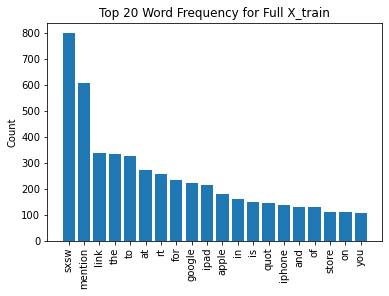

In [163]:
train_freq_dist = FreqDist(X_train['tweet_text_token'].explode())
visualize_top_20(train_freq_dist, "Top 20 Word Frequency for Full X_train")


Baseline Model

In [164]:
from sklearn.feature_extraction.text import TfidfVectorizer
Tfid = TfidfVectorizer(max_features=20)
X_train_vectorized = Tfid.fit_transform(X_train['tweet_text'])
pd.DataFrame.sparse.from_spmatrix(X_train_vectorized, columns=Tfid.get_feature_names())

,and,apple,at,for,google,in,ipad,iphone,is,link,mention,of,on,quot,rt,store,sxsw,the,to,you
0,0.000000,0.000000,0.000000,0.000000,0.462913,0.000000,0.00000,0.000000,0.000000,0.368584,0.322716,0.5818,0.000000,0.0,0.000000,0.000000,0.202531,0.407679,0.000000,0.0
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.458605,0.401535,0.0000,0.751630,0.0,0.000000,0.000000,0.251996,0.000000,0.000000,0.0
2,0.000000,0.000000,0.000000,0.000000,0.740153,0.000000,0.00000,0.000000,0.000000,0.589329,0.000000,0.0000,0.000000,0.0,0.000000,0.000000,0.323827,0.000000,0.000000,0.0
3,0.000000,0.000000,0.365292,0.000000,0.000000,0.000000,0.00000,0.470298,0.000000,0.000000,0.277021,0.0000,0.518552,0.0,0.382889,0.000000,0.173853,0.000000,0.350592,0.0
4,0.000000,0.427992,0.351911,0.000000,0.000000,0.000000,0.38281,0.000000,0.000000,0.304804,0.266873,0.0000,0.000000,0.0,0.000000,0.490087,0.167485,0.000000,0.337750,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.519814,0.515627,0.349705,0.000000,0.5520,0.000000,0.0,0.000000,0.000000,0.192157,0.000000,0.000000,0.0
746,0.360993,0.000000,0.269581,0.290798,0.000000,0.000000,0.00000,0.000000,0.344278,0.233494,0.613312,0.0000,0.000000,0.0,0.282567,0.000000,0.128301,0.000000,0.258732,0.0
747,0.000000,0.000000,0.000000,0.453825,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.319048,0.0000,0.000000,0.0,0.000000,0.000000,0.200229,0.000000,0.807564,0.0
748,0.567987,0.000000,0.000000,0.000000,0.461401,0.537383,0.00000,0.000000,0.000000,0.367380,0.000000,0.0000,0.000000,0.0,0.000000,0.000000,0.201869,0.000000,0.000000,0.0


In [165]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score
baseline_model = MultinomialNB()
baseline_cv = cross_val_score(baseline_model, X_train_vectorized, y_train)
baseline_cv

array([0.61333333, 0.61333333, 0.61333333, 0.60666667, 0.60666667])

Improving model through removing stop words

In [166]:
stopwords_list = stopwords.words('english')
len(stopwords_list)

179

Add sxsw,ipad,apple,google,iphone,andriod to stopwords list.

In [167]:
newstopwords=['sxsw','ipad','apple','google','iphone','android','rt']
stopwords_list.extend(newstopwords)
len(stopwords_list)

186

In [168]:
def remove_stopwords(token_list):
  
    stopwords_removed = [token for token in token_list if token not in stopwords_list]
    return stopwords_removed

In [169]:
X_train["tweet_text_without_stopwords"] = X_train["tweet_text_token"].apply(remove_stopwords)

<ipython-input-169-46ccc65583cc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train["tweet_text_without_stopwords"] = X_train["tweet_text_token"].apply(remove_stopwords)


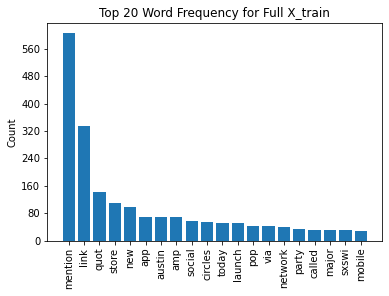

In [170]:
train_freq_dist = FreqDist(X_train['tweet_text_without_stopwords'].explode())
visualize_top_20(train_freq_dist, "Top 20 Word Frequency for Full X_train")

In [184]:
tfidf1 = TfidfVectorizer(
    max_features=20,
    stop_words=stopwords_list)
X_train_vectorized1 = tfidf1.fit_transform(X_train["tweet_text"])
pd.DataFrame.sparse.from_spmatrix(X_train_vectorized1, columns=tfidf1.get_feature_names())


,amp,app,austin,called,circles,launch,link,major,mention,mobile,network,new,party,pop,quot,social,store,sxswi,today,via
0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.752369,0.0,0.658742,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000
1,0.0,0.000000,0.0,0.0,0.000000,0.0,0.752369,0.0,0.658742,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000
2,0.0,0.000000,0.0,0.0,0.667513,0.0,0.336578,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.664185,0.000000,0.0,0.0,0.000000
3,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,1.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000
4,0.0,0.000000,0.0,0.0,0.000000,0.0,0.479360,0.0,0.419707,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.770753,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,0.0,0.882346,0.0,0.0,0.000000,0.0,0.470602,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000
746,0.0,0.000000,0.0,0.0,0.000000,0.0,0.355797,0.0,0.934563,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000
747,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,1.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000
748,0.0,0.000000,0.0,0.0,0.000000,0.0,0.385384,0.0,0.000000,0.922756,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000


In [177]:
stopwords_removed_cv = cross_val_score(baseline_model, X_train_vectorized1, y_train)
stopwords_removed_cv

array([0.64      , 0.62      , 0.58      , 0.6       , 0.62666667])

Lemmatize to improve model

In [174]:
from nltk.stem import WordNetLemmatizer
Lemmatizer=WordNetLemmatizer()

def lem_and_tokenize(document):
    tokens = tokenizer.tokenize(document)
    return [Lemmatizer.lemmatize(token) for token in tokens]

In [175]:
# lemmatize stop words
Lemmed_stopwords = [Lemmatizer.lemmatize(word) for word in stopwords_list]

In [185]:
tfidf2 = TfidfVectorizer(
    max_features=20,
    stop_words=Lemmed_stopwords,
    tokenizer=lem_and_tokenize
)
X_train_vectorized2 = tfidf2.fit_transform(X_train["tweet_text"])
pd.DataFrame.sparse.from_spmatrix(X_train_vectorized2, columns=tfidf2.get_feature_names())

,amp,app,austin,called,circle,get,launch,line,link,major,mention,network,new,party,pop,quot,social,store,today,via
0,0.0,0.00000,0.0,0.0,0.000000,0.0,0.0,0.0,0.751826,0.0,0.659362,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.000000
1,0.0,0.00000,0.0,0.0,0.000000,0.0,0.0,0.0,0.751826,0.0,0.659362,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.000000
2,0.0,0.00000,0.0,0.0,0.667638,0.0,0.0,0.0,0.336082,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.66431,0.000000,0.0,0.000000
3,0.0,0.00000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.000000
4,0.0,0.00000,0.0,0.0,0.000000,0.0,0.0,0.0,0.480517,0.0,0.421420,0.0,0.0,0.0,0.0,0.0,0.00000,0.769096,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,0.0,0.88267,0.0,0.0,0.000000,0.0,0.0,0.0,0.469993,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.000000
746,0.0,0.00000,0.0,0.0,0.000000,0.0,0.0,0.0,0.355281,0.0,0.934759,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.000000
747,0.0,0.00000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.000000
748,0.0,0.00000,0.0,0.0,0.000000,0.0,0.0,0.0,1.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.000000


In [186]:
stopwords_removed_cv_lem = cross_val_score(baseline_model, X_train_vectorized2, y_train)
stopwords_removed_cv_lem

array([0.61333333, 0.60666667, 0.58666667, 0.60666667, 0.60666667])

Final Model

In [180]:
final_model = MultinomialNB()

final_model.fit(X_train_vectorized1, y_train)
final_model.score(X_train_vectorized1, y_train)

0.624

In [181]:
X_test.isna().sum()

tweet_text                           0
emotion_in_tweet_is_directed_at    163
dtype: int64

In [182]:
X_test['tweet_text']=X_test['tweet_text'].fillna('').apply(str)
X_test

<ipython-input-182-aebd2e1d69ab>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['tweet_text']=X_test['tweet_text'].fillna('').apply(str)


,tweet_text,emotion_in_tweet_is_directed_at
8516,from @mention marissa mayer: 40% of google map...,Other Google product or service
8167,#madmen rt @mention hanging out with @mention ...,NaN
59,@mention @mention &amp; @mention having fun ...,NaN
8037,apple is so smart: the ipad 2 takes over #sxsw...,Apple
2744,every time u hold yur ipad 2 up in the air to ...,NaN
...,...,...
4711,there is nothing quite like #sxsw to make you ...,iPad
4890,found a road dawg to check out this ipad store...,iPad
975,#apple to open pop-up shop at #sxsw [report]: ...,NaN
4874,be sure to stop by our sxsw booth today. show ...,iPad


In [183]:
y_test.value_counts()

2    158
1     74
0     18
Name: is_there_an_emotion_directed_at_a_brand_or_product, dtype: int64

In [187]:
X_test_vectorized = tfidf1.transform(X_test['tweet_text'])

In [188]:
final_model.score(X_test_vectorized,y_test)

0.648

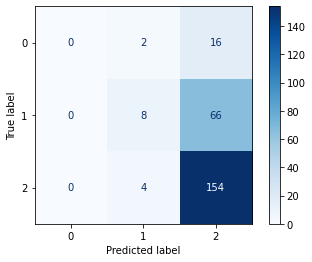

In [189]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cnf_matrix = confusion_matrix(y_test, final_model.predict(X_test_vectorized))
disp = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix, display_labels=final_model.classes_)
disp.plot(cmap=plt.cm.Blues)